<a href="https://colab.research.google.com/github/Priyamchamp/nueral-nets/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DOWNLOADING THE DATASETS

In [ ]:
!kaggle datasets download -d samuelcortinhas/cats-and-dogs-image-classification

 87% 56.0M/64.4M [00:00<00:00, 111MB/s] 
100% 64.4M/64.4M [00:00<00:00, 112MB/s]


TRAINING A CNN MODEL WITH DATA AUGMENTATION FOR DECREASING THE OVERFITTING

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_ds = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_ds = validation_datagen.flow_from_directory(
    '/content/test',
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary')

# Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training
result = model.fit(train_ds, epochs=30, validation_data=validation_ds)


Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Epoch 1/30
18/18 [==============================] - 8s 328ms/step - loss: 5.4655 - accuracy: 0.4722 - val_loss: 4.1794 - val_accuracy: 0.5286
Epoch 2/30
18/18 [==============================] - 4s 246ms/step - loss: 5.2171 - accuracy: 0.5242 - val_loss: 4.0998 - val_accuracy: 0.5214
Epoch 3/30
18/18 [==============================] - 4s 248ms/step - loss: 4.7410 - accuracy: 0.5278 - val_loss: 4.1539 - val_accuracy: 0.5000
Epoch 4/30
18/18 [==============================] - 5s 308ms/step - loss: 4.2995 - accuracy: 0.5548 - val_loss: 4.8929 - val_accuracy: 0.5000
Epoch 5/30
18/18 [==============================] - 4s 251ms/step - loss: 3.9777 - accuracy: 0.5206 - val_loss: 3.8306 - val_accuracy: 0.5000
Epoch 6/30
18/18 [==============================] - 5s 291ms/step - loss: 3.6808 - accuracy: 0.5583 - val_loss: 4.3908 - val_accuracy: 0.5000
Epoch 7/30
18/18 [==============================] - 5s 245ms/step 

EVALUATING THE MODEL

In [ ]:
loss,accuracy=model.evaluate(validation_ds)

5/5 [==============================] - 1s 134ms/step - loss: 1.4292 - accuracy: 0.4929


TESTING THE MODEL

(148, 220, 3)
1/1 [==============================] - 0s 19ms/step
the image is of the dog


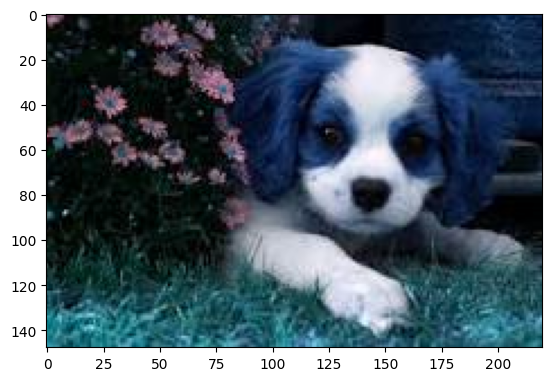

In [ ]:
#importing the model testing

test_img=cv2.imread('/content/download (1).jpeg')
plt.imshow(test_img)
print(test_img.shape)
test_img=cv2.resize(test_img,(100,100))
test_input=test_img.reshape((1,100,100,3))
a=model.predict(test_input)

if a>0.5:
  print("the image is of the dog")
else:
  print("the image is of the cat")

(148, 214, 3)
1/1 [==============================] - 0s 17ms/step
[[1.]]


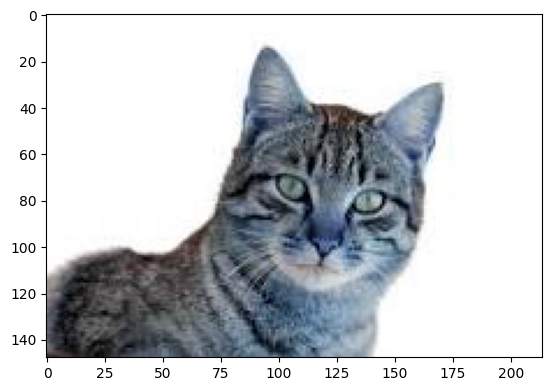

IMPORTING THE KAGGLE API JSON FILE

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

UNZIP THE FILE

In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs and cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()